Load the dataset into the tool.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. Perform Below Visualizations. 
   Univariate Analysis
   Bivariate Analysis
   Multivariate Analysis

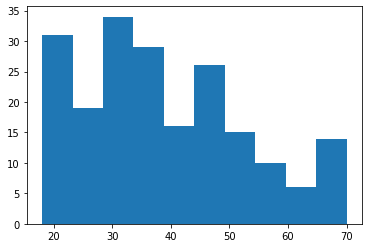

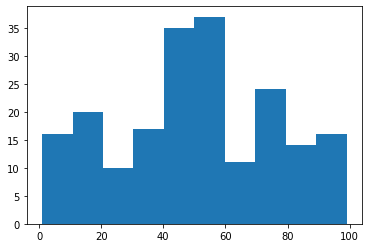

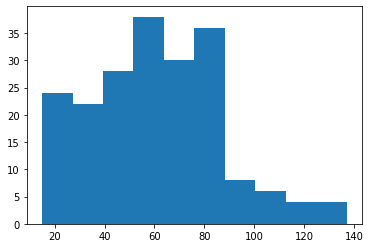

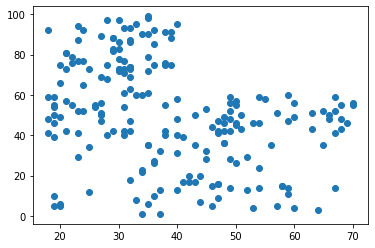

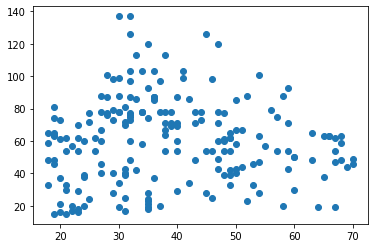

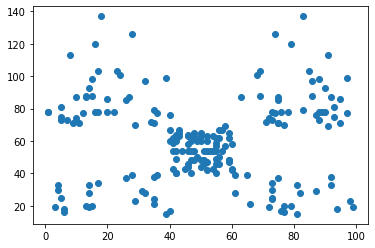

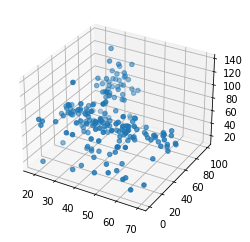

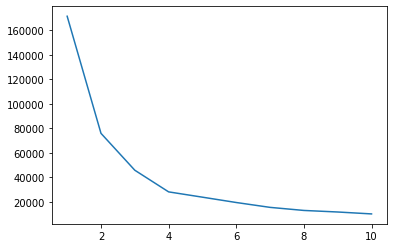

In [40]:

#Univariate Analysis
#Age
plt.hist(df['Age'])
plt.show()

#Spending Score
plt.hist(df['Spending Score (1-100)'])
plt.show()

#Annual Income
plt.hist(df['Annual Income (k$)'])
plt.show()

#Bi-Variate Analysis
#Age vs Spending Score
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.show()

#Age vs Annual Income
plt.scatter(df['Age'],df['Annual Income (k$)'])
plt.show()

#Spending Score vs Annual Income
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'])
plt.show()

#Multi-Variate Analysis
#Age vs Spending Score vs Annual Income
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Age'],df['Spending Score (1-100)'],df['Annual Income (k$)'])
plt.show()

#K-Means Clustering
#Age vs Spending Score
X=df.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()





4. Perform descriptive statistics on the dataset.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [42]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [43]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [44]:
df.shape

(200, 5)

In [45]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

5. Check for Missing values and deal with them.

In [46]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

6. Find the outliers and replace them outliers

<AxesSubplot: >

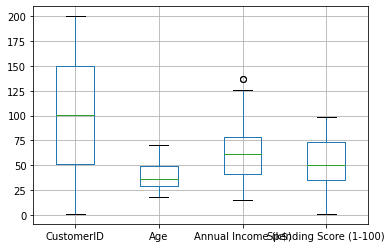

In [47]:
df.boxplot()

<AxesSubplot: >

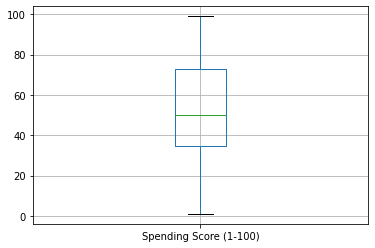

In [48]:
df.boxplot(column='Spending Score (1-100)')

<AxesSubplot: >

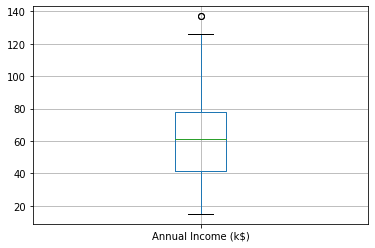

In [49]:
df.boxplot(column='Annual Income (k$)')

<AxesSubplot: >

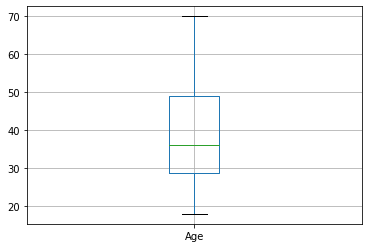

In [50]:
df.boxplot(column='Age')

7. Check for Categorical columns and perform encoding.

In [51]:
df.select_dtypes(include='object').columns

Index(['Gender'], dtype='object')

In [52]:
#Perform encoding for gender column

df=pd.get_dummies(df,columns=['Gender'])
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


8. Scaling the data

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148, -1.12815215,
         1.12815215],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407, -1.12815215,
         1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298,  0.88640526,
        -0.88640526],
       ...,
       [ 1.68877065, -0.49160182,  2.49780745,  0.92395314, -1.12815215,
         1.12815215],
       [ 1.70609137, -0.49160182,  2.91767117, -1.25005425, -1.12815215,
         1.12815215],
       [ 1.7234121 , -0.6351352 ,  2.91767117,  1.27334719, -1.12815215,
         1.12815215]])

9. Perform any of the clustering algorithms

In [57]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=5, random_state=42)

In [58]:
kmeans.labels_

array([4, 4, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 4, 2, 4, 3, 2, 4, 4,
       2, 4, 2, 4, 2, 4, 2, 2, 3, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 4, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 3, 4, 2, 2, 3, 4,
       2, 2, 4, 2, 3, 2, 2, 2, 3, 4, 2, 3, 2, 2, 3, 4, 3, 2, 2, 3, 2, 2,
       2, 2, 2, 4, 3, 2, 2, 4, 2, 1, 3, 4, 1, 2, 3, 4, 3, 1, 2, 3, 3, 3,
       3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [59]:
kmeans.cluster_centers_

array([[ 1.00571233, -0.25605987,  0.9485201 , -0.09735253, -1.12815215,
         1.12815215],
       [ 0.88269077, -0.19763442,  0.8088102 ,  0.11840576,  0.88640526,
        -0.88640526],
       [-0.85997398,  0.07057058, -0.79430582, -0.00647026,  0.88640526,
        -0.88640526],
       [-0.53075649,  1.33075947, -0.48486081, -0.42786906, -1.12815215,
         1.12815215],
       [-0.88871813, -1.01105596, -0.84837918,  0.47658087, -1.12815215,
         1.12815215]])

10. Add the cluster data with the primary dataset

In [66]:
df['Cluster']=kmeans.labels_
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,1,19,15,39,0,1,4
1,2,21,15,81,0,1,4
2,3,20,16,6,1,0,2
3,4,23,16,77,1,0,2
4,5,31,17,40,1,0,2


11. Split the data into dependent and independent
variables.

In [72]:
X=df.drop('Cluster',axis=1)
y=df['Cluster']

12. Split the data into dependent and independent
variables.

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

13. Build the Model

In [74]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

c:\Users\harin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

14. Train the Model

In [75]:
model.score(X_train,y_train)

0.95

15. Test the Model

In [76]:
model.score(X_test,y_test)

0.95

16. Measure the performance using Evaluation Metrics.

In [77]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 7,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  0, 11,  0,  0],
       [ 1,  0,  0,  6,  0],
       [ 1,  0,  0,  0,  4]], dtype=int64)

In [79]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11
           3       1.00      0.86      0.92         7
           4       1.00      0.80      0.89         5

    accuracy                           0.95        40
   macro avg       0.96      0.93      0.94        40
weighted avg       0.96      0.95      0.95        40

